**Materiály vznikají průběžně a jsou bez záruky - prosím o report chyb :-)**

In [1]:
import numpy as np
from scipy.stats import norm, boxcox
import matplotlib.pylab as plt

## Momentová vytvořující funkce

[Momentová vytvořující funkce](https://en.wikipedia.org/wiki/Moment-generating_function)  (moment-generating function, mgf) náhodné veličiny $X$ je definována vztahem

$$
M_X(t) = \operatorname E \left[e^{tX}\right], \quad t \in \mathbb{R},
$$

kde $E$ je operátor střední hodnoty. To nevypadá moc užitečně, dokud si nevzpomeneme na analýzu a na vyjádření $e^x$ pomocí řady:

$$
e^{x} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots +\frac{x^n}{n!} + \cdots.
$$

Když tedy do exponentu dáme $tX$, a budeme středovat, pak ihned vidíme, že

$$
\begin{align}
M_X(t) = \operatorname E (e^{t\,X}) &= 1 + t \operatorname E (X) + \frac{t^2 \operatorname E (X^2)}{2!} + \frac{t^3\operatorname E (X^3)}{3!}+\cdots + \frac{t^n\operatorname E (X^n)}{n!}+\cdots
\end{align}
$$

To možná stále nevypadá užitečně, dokud nezačneme derivovat a dosazovat $t=0$:

$$
\begin{align}
EX &= M_X^{(1)}(0) \\
EX^2 &= M_X^{(2)}(0) \\
EX^n &= M_X^{(n)}(0)
\end{align}
$$

Důležité je stále myslet na to, že

$$
M_X(t) = 
\begin{cases}
\sum_{k=1}^\infty e^{tx_k} P(X=x_k) &\text{pro diskrétní $X$},\\
&\\
\int_\mathbb{R} e^{tx} f(x)dx &\text{pro spojité $X$}.
\end{cases}
$$

**Tedy momenty v předpisu výše v sobě obsahují ony sumy či integrály!**

Mgf má mnoho různě rozdělených náhodných veličin, nicméně nemusí vždy existovat. Její využití je zejména v různých aplikacích, kde máme kombinace náhodných veličin.

## Kvantily

[Kvantily](https://en.wikipedia.org/wiki/Quantile) patří mezi statistické **míry polohy**. Jsou to body, v nichž distribuční funkce dosahuje určité hodnoty. To můžeme zapsat následovně - kvantil $q_a$ je hodnota, kde:

$$
P(X\leq q_a) = a, \qquad\text{tj.}\quad F(q_a) = a, \qquad a\in[0,1].
$$

Například tedy máme:

- **medián** - $q_{0.50}$ - ten leží uprostřed. Proto se mu také říká **prostřední hodnota**. Pravděpodobnost, že dostaneme tuto hodnotu nebo nižší je právě 0.5.
- **horní a dolní kvartil** - $q_{0.25}, q_{0.75}$ - ty leží v první čtvrtině a ve třech čtvrtinách rozsahu $X$. Mezi nimi je tzv. **mezikvartilové rozpětí** (inter-quartile range), které zahrnuje 50% hodnot.
- **decily** - $q_{0.10},\ldots,q_{0.90}$. Ty už celkem pěkně popisují rozdělení náhodné veličiny.
- **percentily** - $q_{0.01},\ldots,q_{0.99}$. Zde máme popis pro normální rozdělení velmi výstižný.

Následující dva obrázky demonstrují mezikvartilové rozpětí - polohu horního a dolního kvartilu, mezi nimi ležících 50% hodnot náhodné veličiny. V boxplotu (též krabicový graf) je vidět navíc odlehlé hodnoty (kolečka) a medián (prostřední kvantil).

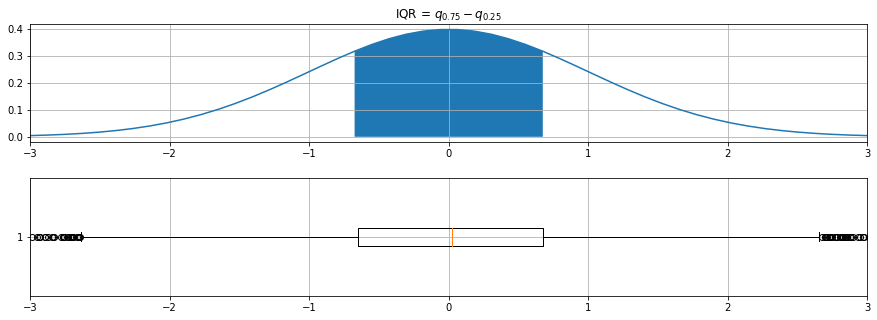

In [2]:
plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
plt.plot(np.linspace(-3, 3), norm.pdf(np.linspace(-3, 3)))
q0_25 = norm.ppf(0.25)
q0_75 = norm.ppf(0.75)
points = np.linspace(q0_25, q0_75, 100)
plt.fill_between(points, norm.pdf(points), y2=0)
plt.title(r'IQR = $q_{0.75} - q_{0.25}$')
plt.xlim((-3,3))
plt.subplot(2, 1, 2)
plt.boxplot(norm.rvs(size=10000), vert=False)
plt.xlim((-3,3))
plt.show()

### Příklad

Podívejme se na triviální příkládek se mzdou a porovnejme, jak je průměr citlivý na odlehlé hodnoty, zatímco výběrový medián nikoliv. I proto se mu říká robustní míra polohy. My se v předmětu zatím nezabýváme výběrovými statistikami, ale pro ilustraci jsou často užitečnější.

![Kvantily](img/kvantily.jpg)

# Téma 5: Transformace náhodných veličin

Statistické analýzy, dobývání znalostí z dat, předpovědi atd. zpravidla předpokládají, že se data chovají dobře. Například, že mají nějaké rozumné (nejlépe normální) rozdělení, s nímž se dobře pracuje. Typický problém, s nímž se lze setkat např. v analýze časových řad je [heteroskedasticita](https://en.wikipedia.org/wiki/Heteroscedasticity), tj. proměnnost variance dat v čase.

![Hetero](img/Hetero.png)

To představuje pro analýzy problém. Jedním z prostředků, jak se s tímto problémem vyrovnat, je použít nějakou vhodnou transformaci, tj. funkci, který tento jev odstraní (nebo vhodně zamaskuje). Příkladem může být [Boxova-Coxova transformace](https://en.wikipedia.org/wiki/Power_transform).

Zaveďme si teoreticky [transformace náhodných veličin](https://en.wikipedia.org/wiki/Random_variable#Functions_of_random_variables), též funkce náhodných veličin:

> **Věta**
>
> Buď $X$ náhodná veličina a $t:\mathbb{R}\to\mathbb{R}$ měřitelná funkce. Pak $Y=t(X)$ je také náhodná veličina a platí
>
>$$
F_Y(y) = P(Y\leq y) = P\left(t(X) \leq y \right)
$$

## Transformace diskrétní náhodné veličiny

Je-li $X$ náhodná veličina s pravděpodobnostní funkcí $P(X=x_k)$, potom pro pravděpodobnostní funkci $Y=t(X)$ platí

$$
P(Y=y_k) = \sum_{x_k\in t^{-1}(y_k)} P(X=x_k).
$$

Co to znamená? Pravděpodobnostní funkci pro $Y$ dostaneme tak, že posčítáme pravděpodobnosti všech $x_k$, která se do daného $y_k$ zobrazí.

### Příklad (6.5)

**Nechť náhodná veličina $X$ nabývá hodnot $\{0,\ldots, 7\}$, všech se stejnými pravděpodobnostmi. Definujme náhodnou veličinu $Y$ následovně:**

$$
Y =
\begin{cases}
1 &\text{pro}\ X<\frac{1}{2},\\
2 &\text{pro}\ X\geq\frac{1}{2}.
\end{cases}
$$

**a) Najděte a nakreslete distribuční funkci.**

![img](img/65Graf.png)

Pro ilustraci obrázek ukazuje pravděpodobnostní funkci $X$, $Y$ a nakonec i distribuční funkci $Y$. Pozn.: v testech nemusíte kreslit jiné než cílové obrázky, ale vždy označte to, na co jsme se ptáme ;)

$$
F(Y) = 
\begin{cases}
0 &\text{pro}\ Y<1,\\
\frac{1}{8} &\text{pro}\ Y\in[1,2),\\
1 &\text{pro}\ Y\geq 2.
\end{cases}
$$

**b) Najděte střední hodnotu $Y$.**

$$
EY = \sum_{k=1}^2 y_k P(Y=y_k) = \frac{1}{8}\cdot 1 + \frac{7}{8}\cdot 2 = \frac{15}{8}. 
$$

## Transformace spojité náhodné veličiny

> **Věta:**
> Buď $X$ náhodná veličina se spojitou distribuční funkcí $F$ a nechť všude - nanejvýš s výjimkou konečně mnoha bodů - existuje $F'(x) = f(x)$. Buď $t$ spojitá ryze monotónní funkce, jež má všude derivaci. Označme její inverzi $\tau = t^{-1}$. Potom
>
>$$
f_Y(y) = f_X\big(\tau(y)\big)\cdot \big|\tau'(y)\big|.
$$
>
>Potom navíc pro $t$ rostoucí
>$$
F_Y(y) = P(Y\leq y) = P(t(X) \leq y) = P(X \leq \tau(y)) = F_X(\tau(y))
$$
>
>a $t$ klesající
>
>$$
F_Y(y) = P(Y\leq y) = P(t(X) \leq y) = P(X \geq \tau(y)) = 1 - F_X(\tau(y)).
$$

To je i důvod oné absolutní hodnoty výše.

### Příklad s klesající funkcí

Uvažujme rovnoměrně rozdělenou veličinu $X\sim \mathcal{U}(0, b)$, kde $b>0$ a definujme

$$
Y = t(X) = \frac{1}{X} \qquad\text{a tedy $Y\in(b^{-1}, \infty)$}.
$$

Víme, že $f_X(x) = 1/b$ na intervalu $(0, b)$, dále že $\tau(Y) = t^{-1}(y)=\frac{1}{y}$ na intervalu $(b^{-1}, \infty)$ a jdeme určit $f_Y(y)$ podle věty výše:

$$
\begin{aligned}
f_Y(y) &= f_X(\tau(y)) \cdot |\tau'(y)| = \frac{1}{b} \cdot \left|\left(\frac{1}{y}\right)'\right| 
= \frac{1}{b} \cdot \left|\frac{-1}{y^2} \right| \\
&= \frac{1}{by^2} \qquad\text{pro $y\in (b^{-1},\infty)$}.
\end{aligned}
$$

Připomeňme, že distribuční funkce zmíněného rozdělení je $F_X(x) = \frac{x}{b}$. Jelikož $t(X)$ je funkce klesající, pro distribuční funkci použijeme druhý vzorec ve větě a dostaneme

$$
\begin{aligned}
F_Y(y) = 1- F_X(\tau(y)) 
= 1 - \frac{\tau(y)}{b} = 1 - \frac{\frac{1}{y}}{b} = 1-\frac{1}{by}.
\end{aligned}
$$

Dosazením lze snadno ověřit, že roste na $(b^{-1},\infty)$ od 0 do 1.

### Příklad 6.6

**Nechť $X\sim \mathcal{U}(a,b)$ je rovnoměrně rozdělená náhodná veličina na intervalu $(a,b)$. Uvažujme $a<b$ a současně $a = 0$. Definujme**

$$
Y = X^2.
$$

*Níže označíme $t(X) = X^2$. Z toho plyne $t^{-1}(Y) = \tau(Y) = \sqrt{Y}$. Dále víme, že $Y$ je definováno na intervalu $[a^2, b^2]=[0, b^2]$ a že pro $a=0$ máme*

$$
F_X(x) = \frac{x-a}{b-a} = \frac{x}{b}.
$$

**a) Je $Y$ náhodná veličina?**

Ano, viz definice.

**b) Najděte distribuční funkci $Y$.**

$$
F_Y(y) = P(Y\leq y) = P(t(X) \leq y) = F_X(\tau(y)).
$$

Tedy
$$
F_Y(y) =
\begin{cases}
0 & \text{pro}\ y<0,\\
\frac{\sqrt{y}}{b} & \text{pro}\ y\in[0,b^2],\\
1 & \text{pro}\ y>b^2.\\
\end{cases}
$$


**c) Určete typ rozdělení (diskrétní, spojité, smíšené).**

Spojitá funkce spojité náhodné veličiny dává spojitou náhodnou veličinu.

**d) Určete hustotu (popř. pravděpodobnostní funkci) $Y$, pokud to lze.**

$$
f_Y(y) = [F_Y(y)]' =
\begin{cases}
\frac{1}{2b\sqrt{y}} & \text{pro}\ y\in[0,b^2],\\
0 & \text{jinde}.\\
\end{cases}
$$

**e) Spočtěte $EY$ pomocí rozdělení $Y$ a pomocí vztahu $EY = EX^2$.**

$$
\begin{aligned}
EY 
&= \int_{\mathbb{R}} y \cdot f_Y(y) dy = \int_{0}^{b^2} y\cdot \frac{1}{2b\sqrt{y}} dy
= \frac{1}{2b} \left[ \frac{2}{3} y^{\frac{3}{2}} \right]_0^{b^2} = \frac{b^2}{3}. \\
EY 
&= EX^2 = \int_\mathbb{R} x^2 \cdot f_X(x)dx = \int_0^b x^2 f(x) dx = \int_0^b x^2 \frac{1}{b} dx = \frac{1}{b}\left[\frac{x^3}{3}\right]_0^b = \frac{b^2}{3}.
\end{aligned}
$$

**+f) Jak se situace změní pro obecný interval?**

Viz příslušné vzorečky.

## Lineární transformace

**Zamysleme se nejprve intuitivně nad následujícím:**

* Pokud násobím všechny hodnoty výběru nějakou konstantou $a$, jak se změní hodnota průměru?
* Pokud přičtu ke všem hodnotám výběru jinou konstantu $b$, jak se změní hodnota průměru?
* Jaký je rozptyl konstanty?
* Vynásobím-li konstantou $a$ všechny hodnoty výběru, jak se změní rozptyl (zamyslete se nad vzorečkem pro rozptyl).

Intuitivní zamyšlení nad výběrem často dává návod, jak to bude s náhodnou veličinou. Je to trochu zkratkovité, ale funguje to :-)

> **Věta**
>
> Buď $X$ náhodná veličina a $a,b\in\mathbb{R}$. Definujme $Y = aX + b$. Pak platí
>
> $$
\begin{aligned}
EY &= E(aX+b) = a\cdot EX + b, \\
\operatorname{var} Y &= \operatorname{var}(aX + b) = a^2 \operatorname{var} X.
\end{aligned}
$$

### Příklad

**Předpokládejme, že náhodná veličina $X$ splňuje:**

$$
EX =0, \qquad EX^2=1, \qquad EX^3=0, \qquad EX^4 = 2.
$$

**Definujme náhodné veličiny**

$$
\begin{align}
Y &= 1-3X, \\
Z &= 2+X^2.
\end{align}
$$

**a) Nalezněte střední hodnotu a rozptyl $Y$ a $Z$.**

Jednoduše využijeme vzorečky:

$$
\begin{align}
EY &= E[1-3X] = 1-3EX = 1,\\
EZ &= E[2+X^2] = 2+EX^2 = 3,\\
\operatorname{var}Y &= \operatorname{var}(1-3X) = 9\operatorname{var}X = 9[EX^2 - (EX)^2] = 9,\\
\operatorname{var}Z &= \operatorname{var}(2+X^2) = \operatorname{var}X^2 = E(X^2)^2 - (EX^2)^2 = 2-1 = 1.
\end{align}
$$

**+b) Nalezněte příklad náhodné veličiny $X$.**

Centrujeme v nule, obklopíme stejnými hodnotami s rozdílnými znaménky a hledáme tyto hodnoty, aby splňovaly podmínky. Např. tedy $X\in\left\{-\sqrt{2}, 0, \sqrt{2}\right\}$ s pravděpodobnostmi $\left\{\frac{1}{4}, \frac{1}{2}, \frac{1}{4}\right\}$.

## Standardizace do $\mathcal{N}(0, 1)$

Normální rozdělení má dva parametry - střední hodnotu $\mu$ a rozptyl $\sigma^2$. V mnoha statistických aplikacích - např. při testování hypotéz aj. - potřebujeme pracovat s tímto rozdělením. Dnes již k výpočtům můžeme používat počítač, ale dříve se postupovalo s předpočítanými tabulkami $\mathcal{N}(0, 1)$, do něhož bylo potřeba veličinu převést. Tuto **transformaci** do [standardního normálního rozdělení](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution) vyjadřuje následující věta.

> **Věta (standardizace normálního rozdělení)**
>
> Pokud $X\sim\mathcal{N}(\mu, \sigma^2)$, potom veličina $Z = \frac{X-\mu}{\sigma}$ má rozdělení $\mathcal{N}(0, 1)$.

Pokud tedy potřebujeme spočítat některé vlastnosti pro nestandardní normální veličinu, provedeme transformaci do $\mathcal{N}(0,1)$ a někdy potom i inverzní transformaci zpět do $\mathcal{N}(\mu, \sigma^2)$,

$$
X = \sigma Z + \mu \qquad \Longrightarrow X\sim \mathcal{N}(\mu, \sigma^2).
$$

Uvědomme si, co dělá $\mu$ v této transformaci: jde o **posun** polohy střední hodnoty! A $\sigma$, ačkoliv zde je představa těžší, nám veličinu odpovídající měrou "rozptýlí". Třídě distribucí, které se takto chovají, se říká [location-scale family](https://en.wikipedia.org/wiki/Location%E2%80%93scale_family) - ale to nemusí student PST vědět :). A znovu - všimnete si, o jakou transformaci jde? Už výše v textu byla ;-)

Je zaběhlým zvykem psát standardní normální veličinu jako $Z$ a její kvantily jako $u$ s dolním indexem značícím polohu kvantilu, např. $u_{0.50}$ či $u_{50}$ pro medián. Stejně tak se často označuje $\phi(x)=f(x)$ a $\Phi(x)=F(x)$.

Je důležité umět si s tímto rozdělením pohrát - k tomu je vždy nejlepší si kreslit, kreslit, kreslit...

![gaussF](img/gaussF.jpg)

A pokud vybíráme hodnoty symetricky okolo středu, budeme postupovat následovně:

![gaussU](img/gaussU.jpg)

A ještě jedna rada na závěr: Pokud vybíráme 95% obor, znamená to, že pracujeme s kvantily $u_{0.025}$ a $u_{0.975}$, protože zbylých 5% se nám rozdělí symetricky do chvostů.

### Příklad (6.3)

**Nechť $X\sim \mathcal{N}(5,4)$. Pomocí tabulek vyřešte následující úkoly:**

**a) Najděte $P(X>7.5)$.**

$$
P(X>7.5) = P\left(Z > \frac{X-\mu}{\sigma} \right) = P\left(Z>\frac{2.5}{2}\right) 
= 1 - P(Z\leq 1.25) = 1 - 0.8944 = 0.1056.
$$

In [3]:
1-norm.cdf(7.5, loc=5, scale=np.sqrt(4))

0.10564977366685535

**b) Najděte $P(2.3 < X \leq 6.1)$.**

Použijeme obrázek výše (první ze dvou, pro nesymetrický interval) a postupujeme:

$$
\begin{aligned}
P(2.3 < X \leq 6.1) &= P\left(\frac{2.3-5}{2}<Z\leq \frac{6.1-5}{2}\right) \\
&= P(-1.35<Z\leq0.55) \\
&= P(Z\leq 0.55) - P(Z<-1.35) \\
& = P(Z\leq 0.55) - [1-P(Z\leq 1.35)] = 0.6203.
\end{aligned}
$$

(kreslete si!!!)

In [4]:
norm.cdf(6.1, loc=5, scale=np.sqrt(4)) - norm.cdf(2.3, loc=5, scale=np.sqrt(4))

0.6203323217742517

**c) Najděte $a$ takové, aby $P(X\leq a) = 0.86$ (tj. 0.86-kvantil)**

Budeme hledat $\tilde{a}$, které odpovídá transformovanému kvantilu do $\mathcal{N}(0,1)$ a provedeme transformaci zpět do $\mathcal{N}(5, 4)$:

$$
P(X \leq a) = P(Z\leq \tilde{a}) = 0.86 \Longrightarrow \tilde{a} = 1.08.
$$

Transformace $\tilde{a} \to a$:

$$
\tilde{a} = \frac{a-\mu}{\sigma} = 1.08 \Longrightarrow a = 7.16.
$$

(kreslit, kreslit, kreslit)

In [5]:
norm.ppf(0.86, loc=5, scale=np.sqrt(4))

7.160638681629912

**d) Najděte $a$ takové, aby $P(X>a)=0.025$ (tj. 0.0250-kritickou hodnotu).**

Řešení je podobné předchozímu, jen pozor na (ne)rovnosti. Budeme-li transformovat,

$$
\tilde{a} = \frac{a-\mu}{\sigma},
$$

platí

$$
P(X>a) = P(Z>\tilde{a}) = 0.025.
$$

To je ale funkce přežití a tabulky máme jen pro funkci distribuční. Tedy

$$
P(Z\leq \tilde{a}) = 1-P(Z>\tilde{a}) = 1-0.025 = 0.975 \Longrightarrow \tilde{a} = 1.96.
$$

A pomocí transformace zpět z $\tilde{a}$ do $a$ dostaneme $a = 8.92$.

In [6]:
norm.ppf(1-0.025, loc=5, scale=np.sqrt(4))

8.919927969080108

**e) Najděte $a$ takové, aby $P(5-a<X\leq 5+a) = 0.99$.**

Zde je nutné si uvědomit dvě věci:

1. jde o posunutí celé veličiny o 5: $P(-a<X-5\leq a)$ a jelikož máme střední hodnotu 5, tak se posune střed gaussovky do nuly :)
2. ptáme se opět na symetrický obor okolo střední hodnoty.

$$
X\sim \mathcal{N}(5, 4) - 5 = \mathcal{N}(0, 4), \\
\tilde{a} = \frac{a-\mu}{\sigma} = \frac{a}{\sigma} = 2.575 \Longrightarrow a = 2\tilde{a} = 5.15.
$$

# Příklady ze slajdů

### Příklad (6.2)

**Nechť $X\sim \mathrm{Geom}\left(\frac{1}{2}\right)$. Definujme veličinu $Y=2X-1$.**

**a) Určete rozdělení veličiny $Y$.**

Dané geometrické rozdělení má pravděpodobnostní funkci

$$
P(X=x_k) = (1-p)^{x_k - 1} p = \left(1-\frac{1}{2}\right)^{x_k-1} \frac{1}{2} = \left( \frac{1}{2}\right)^{x_k}.
$$

Vidíme, že mapuje $X\to Y$ jednoznačně a zatímco $X$ má hodnoty $1,2,\ldots$, veličina $Y\sim\{1,3,5,\ldots\}$. Snadno tedy dovodíme, že

$$
P(Y=y_k) = \left(\frac{1}{2}\right)^{\frac{y_k+1}{2}},
$$

kde exponent je inverzní funkce.

**b) Určete $EY$ a $\operatorname{var}Y$.**

Jde o jednoduchou lineární transformaci, viz výše. Tedy použijeme vzorečky pro momenty geometrického rozdělení a dosadíme.

$$
\begin{align}
EY &= E[2X-1] = 2EX - 1 = 2\cdot \frac{1}{\frac{1}{2}} -1 = 3, \\
\operatorname{var}Y &= \operatorname{var}(2X-1) = 2^2\operatorname{var}X = 2^2 \frac{1-\frac{1}{2}}{\left(\frac{1}{2}\right)^2} = 8.
\end{align}
$$

### Příklad (6.4)
**Rozdělení IQ v populaci se řídí $\mathcal{N}(100, 15^2)$. Nechť $X$ je hodnota IQ náhodně zvoleného člověka. Najděte:**

**a) $P(X>130)$.**

$$
P(X>130) = P\left(Z> \frac{X-\mu}{\sigma}\right) = P\left(Z>\frac{30}{15}\right) = 1 - P(Z\leq 2) = 1-0.9772 = 0.0228.
$$

**b) $P(X\in[85,115])$.**

Toto je hezká úloha i na nerovnosti, jež budeme mít později. Všimněte si, že se ptáme na pravděpodobnost do vzdálenosti jedné směrodatné odchylky od středu. To je u standardního normálního rozdělení 1 :)

Podle obrázku se symetrickým případem:

$$
P(X\in[85,115]) = P(Z\in[-\sigma, \sigma]) = P(Z\in[-1, 1]) = 1 - 2P(Z>1) = 1-2[1-P(Z\leq 1)] = 0.6826. 
$$

**c) Takové $k$, aby $P(100-k < X \leq 100 + k) = 0.95$.**

Zde se hodí dolní obrázek o symetrickém případu. Povšimněme si, že máme opět případ s posunem, opět o hodnotu $\mu$, tedy do $\mathcal{N}(0, 15^2)$. Všimněte si, že jelikož v případě normálního rozdělení jde o transformaci přímo jeho parametrů, a to ve tvarech

$$
\begin{aligned}
E[aX + b] &= E[X -100] = E[X] - 100 = 100 - 100 = 0, \\
\operatorname{var}(aX + b) &= \operatorname{var}(X + 100) = \operatorname{var}X = 15^2.
\end{aligned}
$$

Do každého z chvostů se schová 2.5% pravděpodobnosti, tedy hledáme kvantily 0.975 a 0.025. Když si to trochu rozkreslíme:

![img](img/trans64c.jpg)

Snadno nahlédneme, že zpětnou transformací dostaneme $k= 1.96\cdot \sigma = 1.96\cdot 15 =29.4$.

### Příklad (6.7)

**Nechť spojitá náhodná veličina $X$ je určena hustotou**

$$
f_X(x) = 
\begin{cases}
1 &\text{pro}\ x\in(0,1), \\
0 &\text{jinde}.
\end{cases}
$$

**Definujme náhodnou veličinu $Y=\cos(\pi X)$. Najděte distribuční funkci a hustotu $Y$.**

Jde o transformaci spojité veličiny striktně klesající funkcí. Sepišme si tedy co můžeme:

$$
\begin{align}
X &\sim \mathcal{U}(0,1),\\
F_X(x) &= \frac{x-a}{b-a} = \frac{x}{b},\\
t(X) &= Y = \cos(\pi X),\\
\tau(Y) &= t^{-1}(Y) = \arccos(Y),\\
\tau'(Y) &= -\frac{1}{\sqrt{1-Y^2}},\\
Y &\in [-1, 1].
\end{align}
$$

Podle tvrzení o transformaci klesající funkcí $t$ máme:

$$
F_Y(y) = P(Y\leq y) = P(t(X) \leq y) = P(X \geq \tau(y)) = 1 - F_X(\tau(y)) = 
\begin{cases}
0 &\text{pro}\ y<-1,\\
1-\frac{\arccos(y)}{\pi} &\text{pro}\ y\in[-1,1],\\
1 &\text{pro}\ y>1.
\end{cases}
$$

Derivacemi
$$
f_Y(y) = 
\begin{cases}
\frac{1}{\pi\sqrt{1-y^2}} &\text{pro}\ y\in[-1,1],\\
0 &\text{jinde}.
\end{cases}
$$